# Neuronales Netz (Python)

In diesem Kapitel wird ein Neuronales Netz erstellt, welches entscheiden kann ob ein bestimmtes Objekt auf dem Bild zu sehen ist oder etwas anderes. Dieses Netz kann also erstmal nur eine Gruppe z.B. Sechskantschraube von allen anderen unterscheiden.

Wir werden 28x28 Pixel große Bilder von Schraubenköpfen verwenden.

In [85]:
import numpy as np
from numpy import load
from scipy.special import expit
from sklearn.preprocessing import OneHotEncoder
import pickle
import matplotlib.pyplot as plt

## Datensatz laden

In [86]:

X_train = load('Dataset/X_train.npy').astype(np.float32).reshape(-1, 784)*1.0/255.0 
y_train = load('Dataset/y_train.npy')


oh = OneHotEncoder()
y_train_oh = oh.fit_transform(y_train.reshape(-1, 1)).toarray()

X_test=load('Dataset/X_test.npy').astype(np.float32).reshape(-1, 784)*1.0/255.0 
y_test=load('Dataset/y_test.npy')

In [87]:
y_train_oh.shape

(10500, 5)

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(10500, 784)
(4500, 784)
(4500,)


## Label check:

2
[0. 0. 1. 0. 0.]


<function matplotlib.pyplot.show(close=None, block=None)>

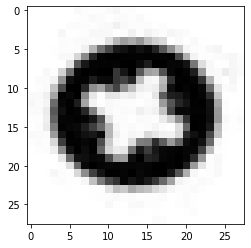

In [89]:
i=8
print(y_train[i])
print(y_train_oh[i])
plt.imshow(X_train[i].reshape(28,28)*255,cmap='gray',vmin=0,vmax=255)
plt.show
# 0: innensechskant
# 1: philips
# 2: pozidriv
# 3: sechskant
# 4: torx

In [90]:
print(X_train.shape)
print(X_test.shape)

(10500, 784)
(4500, 784)


## Neural Network

In [ ]:
import numpy as np

class NeuralNetwork(object):
    def __init__(self, lr = 0.01):
        self.lr = lr

        self.w0 = np.random.randn(100, 784)
        self.w1 = np.random.randn(5, 100)


    def activation(self, x):
        return expit(x)

    def train(self, X, y):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)

        e1 = y.T - pred
        e0 = e1.T @ self.w1

        dw1 = e1 * pred * (1 - pred) @ a0.T / len(X)
        dw0 = e0.T * a0 * (1 - a0) @ X / len(X)

        assert dw1.shape == self.w1.shape
        assert dw0.shape == self.w0.shape

        self.w1 = self.w1 + self.lr * dw1
        self.w0 = self.w0 + self.lr * dw0

        # print("Kosten: " + str(self.cost(pred, y)))

    def predict(self, X):
        a0 = self.activation(self.w0 @ X.T)
        pred = self.activation(self.w1 @ a0)
        return pred

    def cost(self, pred, y):
        # SUM((y - pred)^2)
        s = (1 / 2) * (y.T - pred) ** 2
        return np.mean(np.sum(s, axis=0))

model = NeuralNetwork()

for i in range(0, 20):
    for j in range(0, 10500, 100):
        model.train(X_train[j:(j + 100), :], y_train_oh[j:(j + 100), :])

    y_test_pred = model.predict(X_test)
    y_test_pred = np.argmax(y_test_pred, axis=0)
    print(np.mean(y_test_pred == y_test))


## Genauigkeit interpretieren

Was sagt eine genauigkeit von 90% aus? Ist das gut oder schlecht?

```{warning}

**Beispiel:**
- ja / nein
- 10% / 90%

Wenn das Modell immer "Nein" sagt wird es eine Genauigkeit von 90% erreichen obwohl es alle "ja-Beispiele" nicht erkannt hat.
```